In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
# os.getcwd()
os.chdir('/content/drive/My Drive/DeepLearning_FinalProject')

Mounted at /content/drive


In [2]:
!ls

 checkpoints			     test_data_bank.txt
 DataGenerator.ipynb		     test_data_melli.txt
 Fonts				     test_dataset
 logs				    'test_dataset (1)'
 main_model_2.h5		     test_data.txt
 main_model.h5			     train_data
 model1.h5			     train_data_1
 model.h5			     train_data_bank.txt
 new_test_data			     train_data_melli.txt
 new_train_data			     train_dataset
 new_validation_data		    'train_dataset (1)'
 Numbers_OCR.ipynb		     train_data.txt
'Numbers_OCR_Tensorflow (1).ipynb'   validation_data
 Numbers_OCR_Tensorflow.ipynb	     validation_data_bank.txt
 requirements.txt		     validation_data_melli.txt
 src				     validation_dataset
 test				    'validation_dataset (1)'
 test_data			     validation_data.txt


In [3]:
import numpy as np
from torch.utils.data import Dataset
from torch.utils.data import sampler
import torchvision.transforms as transforms
from PIL import Image

alphabet="0123456789 "
traindir = "./train_dataset"
testdir = "./test_dataset"
valdir = "./validation_dataset"


class SynthDataset(Dataset):
  def __init__(self, imgdir):
    super(SynthDataset, self).__init__()
    self.path = os.path.join(imgdir)
    self.images = os.listdir(self.path)
    self.nSamples = len(self.images)
    f = lambda x: os.path.join(self.path, x)
    self.imagepaths = list(map(f, self.images))
    transform_list =  [transforms.Grayscale(1),
                        transforms.ToTensor(), 
                        transforms.Normalize((0.5,), (0.5,))]
    self.transform = transforms.Compose(transform_list)

  def __len__(self):
    return self.nSamples

  def __getitem__(self, index):
    assert index <= len(self), 'index range error'
    imagepath = self.imagepaths[index]
    imagefile = os.path.basename(imagepath)
    img = Image.open(imagepath)
    # print(imagepath)
    if self.transform is not None:
        img = self.transform(img)
    item = {'img': img, 'idx':index}
    item['label'] = imagefile.split('_')[0]
    return item
    
  def get_all_items(self, num_of_data, width, num_len):
    inputs_mat = []
    outputs_mat = []
    counter = 0
    for i in range(0, num_of_data):
      o_mat = np.zeros((num_len, len(alphabet)))
      imagepath = self.imagepaths[i]
      # print(imagepath)
      imagefile = os.path.basename(imagepath)
      if(not(imagefile[4] == ' ')):
        img = Image.open(imagepath)
        if self.transform is not None:
            img = self.transform(img)
        image = np.ones((img.shape[0], img.shape[1], width), dtype=np.float32)
        image[:, :, 0:img.shape[2]] = img
        image = image.reshape((image.shape[1], image.shape[2], 1))
        inputs_mat.append(image)
        label = imagefile.split('_')[0]
        for j in range(0, num_len):
          index_num = alphabet.find(label[j])
          o_mat[j, index_num] = 1
        outputs_mat.append(o_mat)
        counter += 1
        if(i % 500 == 0):
          print("----------", i)
        # if counter == num_of_data:
        #   break;
    
    inputs_mat = np.array(inputs_mat)
    outputs_mat = np.array(outputs_mat)
    return inputs_mat, outputs_mat 




In [10]:
# # del list

import os

dir = './validation_dataset'
lists = os.listdir(dir) 
number_files = len(lists)
print(number_files)

4286


In [21]:
width = 200
num_len = 10
num_of_train_data = 35000

data = SynthDataset(traindir)
train_x, train_y = data.get_all_items(num_of_train_data, width, num_len)


---------- 5000
---------- 5500
---------- 6000
---------- 6500
---------- 7000
---------- 7500
---------- 8000
---------- 8500
---------- 9000
---------- 9500
---------- 15000
---------- 15500
---------- 16000
---------- 16500
---------- 17000
---------- 17500
---------- 18000
---------- 18500
---------- 19000
---------- 19500
---------- 25000
---------- 25500
---------- 26000
---------- 26500
---------- 27000
---------- 27500
---------- 28000
---------- 28500
---------- 29000
---------- 29500


In [5]:
width = 200
num_len = 10
num_of_test_data = 4374
num_of_val_data = 4286

data = SynthDataset(testdir)
test_x, test_y = data.get_all_items(num_of_test_data, width, num_len)

data = SynthDataset(valdir)
validation_x, validation_y = data.get_all_items(num_of_val_data, width, num_len)

---------- 0
---------- 1000
---------- 2500
---------- 3500
---------- 0
---------- 1000
---------- 2500
---------- 3500


In [34]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)
print(validation_x.shape)
print(validation_y.shape)

(15348, 32, 200, 1)
(15348, 10, 11)
(1875, 32, 200, 1)
(1875, 10, 11)
(1875, 32, 200, 1)
(1875, 10, 11)


In [ ]:
 # height = 32
# # width = 210

# num_len = 32
# # num_of_data = 10

# # data = SynthDataset(traindir)
# # x =SynthCollator()

# def data_preprocessing(dir, num_of_data=100):
#   train_x = []
#   train_y = []
#   counter = 0
#   width = 222
#   train_y = np.zeros((num_of_data, num_len, len(alphabet)))
#   data = SynthDataset(dir)
#   print(len(images_mat))
#   for x, y in data:
#     image = np.ones((x.shape[0], x.shape[1], width), dtype=np.float32)
#     # print(y)
#     image[:, :, 0:x.shape[2]] = x
#     # a, b, c = SynthCollator()
#     image = image.reshape((image.shape[1], image.shape[2], 1))
#     # print(x.shape)
#     train_x.append(image)
#     if(len(y) == 10):
#       y += ' ' * 22
#     elif(len(y) == 19):
#       y += ' ' * 13
#     for i in range(0, num_len):
#       index_num = alphabet.find(y[i])
#       train_y[counter, i, index_num] = 1

#     # print(y, train_y[counter])
#     # train_x.append(code)
#     train_y = np.array(train_y)
#     counter +=1
#     print(counter)
#     if(counter % 500 == 0):
#       print("----------", counter)
#     if counter == num_of_data:
#       break;
#   return train_x, train_y

# data_preprocessing(traindir, num_of_data=1600)
# train_x, train_y = data_preprocessing(traindir, num_of_data=1600)
# test_x, test_y = data_preprocessing(testdir, num_of_data=2000)
# validation_x, validation_y = data_preprocessing(valdir, num_of_data=2000)
# print(train_y)
# train_x = np.array(train_x)
# print(train_x.shape)
# train_x = [data[i]['img'] for i in range(0, number_files)]
# train_x = np.array(train_x)
# print(train_x.shape)
# print(data[0]['img'].numpy())


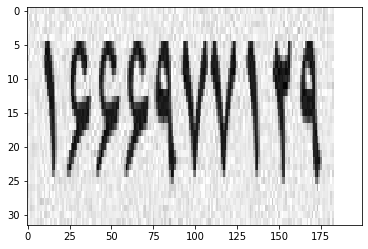

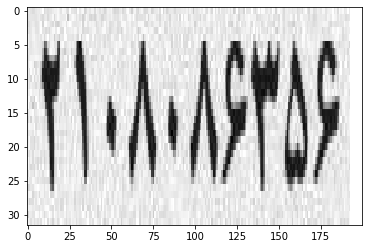

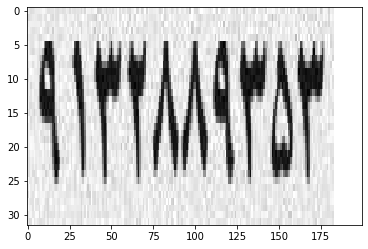

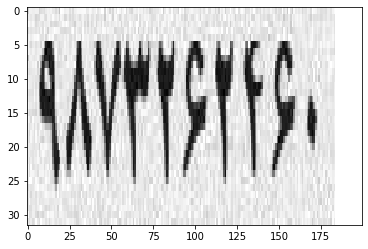

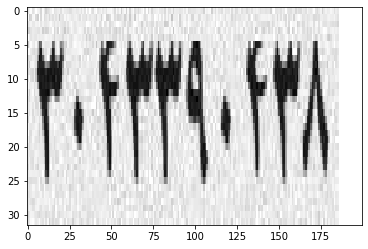

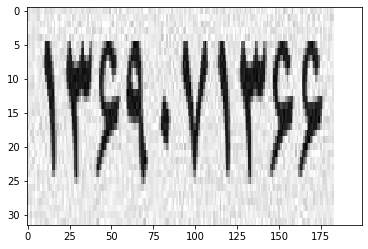

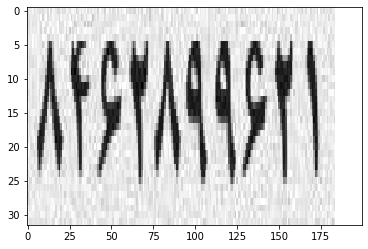

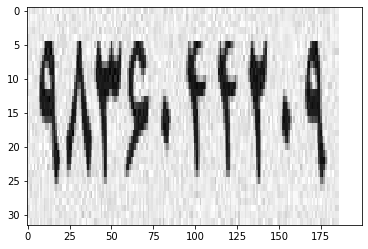

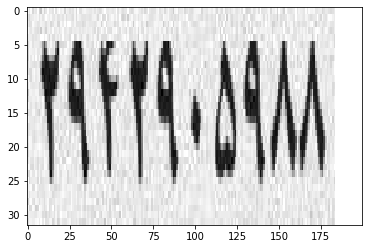

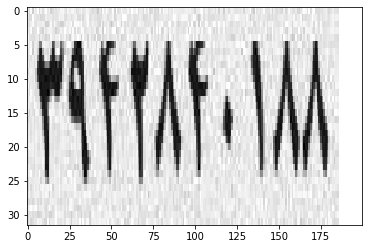

[[[0. 1. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 1. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 1. 0.]]

 [[0. 0. 1. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 1. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 1. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 1. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]]

 [[0. 0. 1. ... 0. 0. 0.]
  [0. 0. 0. ... 1. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 1. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
(15348, 32

In [25]:
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical

def convert_output_to_text(output):
  output_text = ""
  for i in range(0, output.shape[0]):
    for j in range(0, output.shape[1]):
      index_word = np.argmax(output[i, j] == 1)
      output_text += alphabet[index_word]
  return output_text


for i in range(10):
  temp = train_x[i].reshape((train_x[i].shape[0], train_x[i].shape[1]))
  plt.imshow(temp, cmap='gray', aspect="auto", interpolation='nearest')
  # title = "number " + str(train_y[i])
  # plt.title(title)
  plt.show()
# train_y = to_categorical(train_y)
print(train_y)

print(train_x.shape)
print(train_y.shape)

In [26]:
from tensorflow.keras.backend import ctc_batch_cost
import tensorflow as tf

def custom_ctc():
    def loss(y_true, y_pred):
        batch_labels = y_true[:, :, 0]
        label_length = y_true[:, 0, 1]
        input_length = y_true[:, 0, 2]

        label_length = tf.expand_dims(label_length, -1)
        input_length = tf.expand_dims(input_length, -1)
        return ctc_batch_cost(batch_labels, y_pred, input_length, label_length)
    return loss

def CTCLoss(y_true, y_pred):
    # Compute the training-time loss value
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

In [35]:
from tensorflow.python.keras.backend import conv2d
from numpy.core.fromnumeric import shape
import keras
from tensorflow.keras import Sequential
import tensorboard
from keras.models import load_model

def model():
  model = Sequential(
    [
     tf.keras.layers.Input(shape=(train_x.shape[1], train_x.shape[2], 1)),
     tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation="relu", padding="same"),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding="same"),
     tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding="SAME"),
     tf.keras.layers.ZeroPadding2D(padding=(1,1)),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten()),
     tf.keras.layers.LSTM(50, activation='relu', return_sequences=True),
     tf.keras.layers.LSTM(11, activation='softmax', return_sequences=True)
    ])
  return model

model = model()
model.summary()
# custom_loss = custom_ctc()
# custom_loss = CTCLoss()
# model = load_model('model.h5')
model.compile(
    optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001, name='Adam'),
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)
# print(train_x.shape)
# print(train_y.shape)

# tf.keras.models.save_model(model, "saved_models", overwrite=True, include_optimizer=False)



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 200, 16)       160       
                                                                 
 batch_normalization_12 (Bat  (None, 32, 200, 16)      64        
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 200, 32)       4640      
                                                                 
 batch_normalization_13 (Bat  (None, 32, 200, 32)      128       
 chNormalization)                                                
                                                                 
 dropout_7 (Dropout)         (None, 32, 200, 32)       0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 100, 32)     

In [42]:
from keras.models import load_model

model = load_model('model_melli_2.h5')

history = model.fit(train_x, train_y, epochs=1, batch_size=32, validation_data=(validation_x, validation_y), shuffle=True,
                     callbacks=keras.callbacks.TensorBoard(log_dir='logs/model_melli'))
model.save('model_melli_2.h5')
model.summary()

480/480 [==============================] - ETA: 0s - loss: nan - accuracy: 0.1212

KeyboardInterrupt: ignored

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs

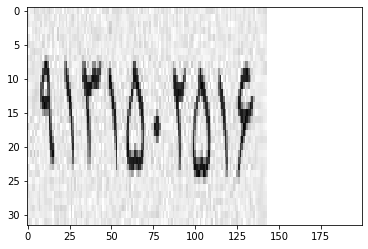

5131500226


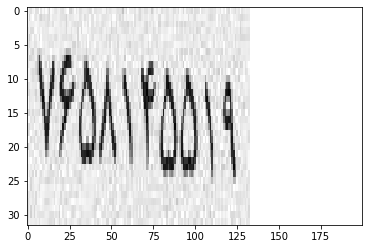

5658195509


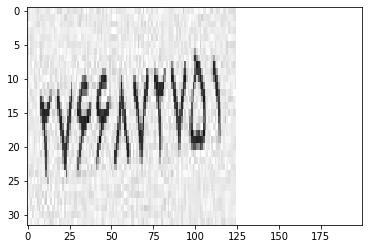

5566870801


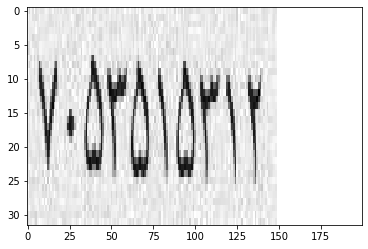

5053511102


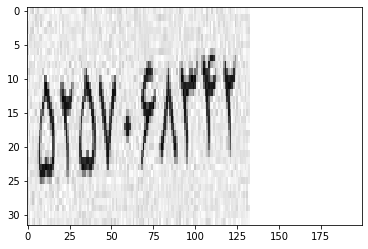

5157068022


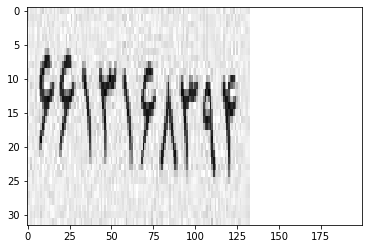

5612168224


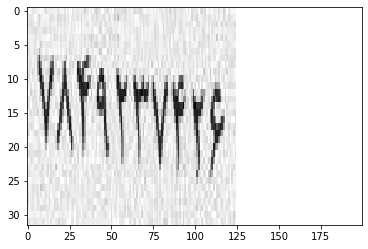

5849237306


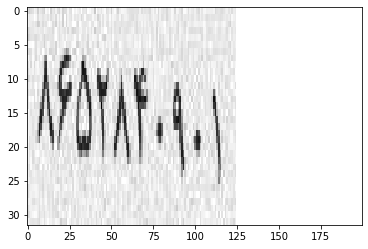

5652840101


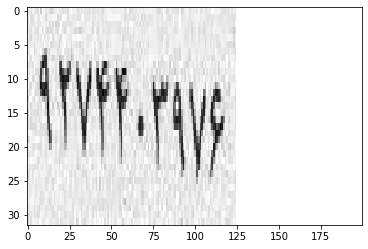

5274404906


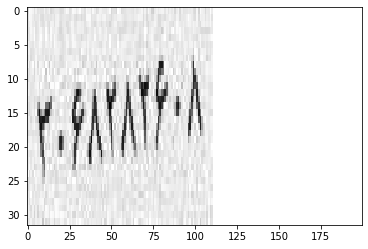

5198280625


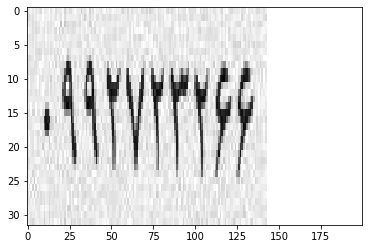

5962723066


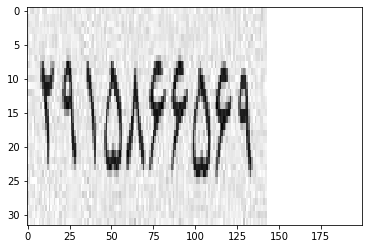

5985866069


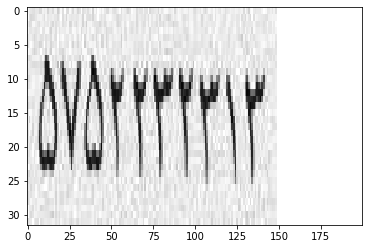

5152242207


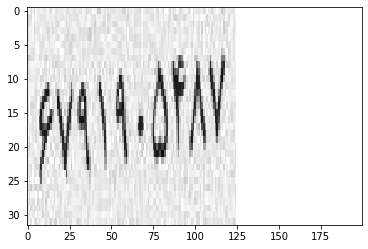

5591905127


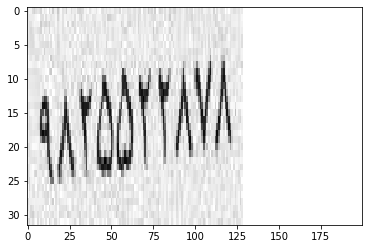

5525522008


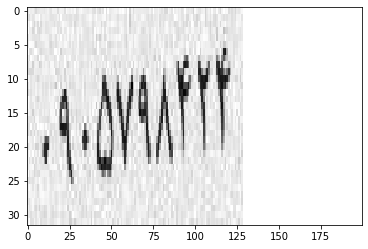

5505798004


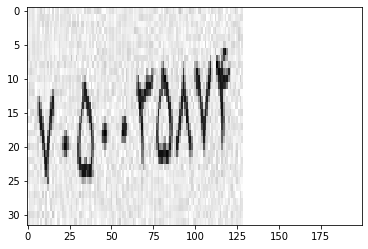

5510035274


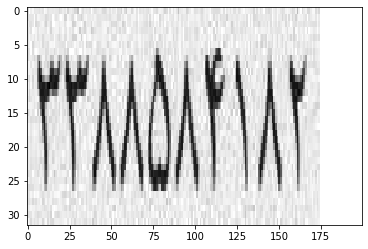

5388584182


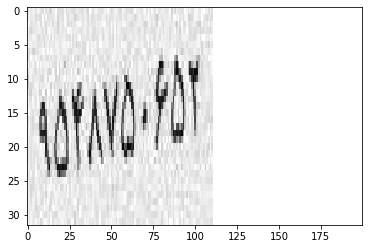

5598750605


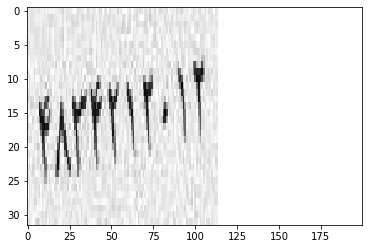

5824210002


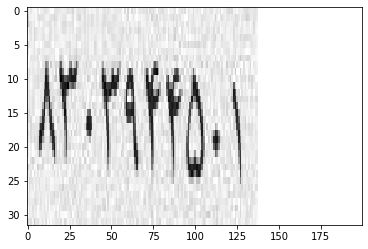

5303943521


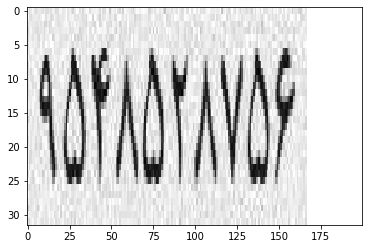

5548528756


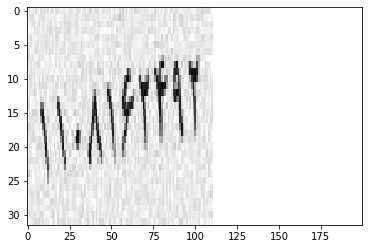

5508162022


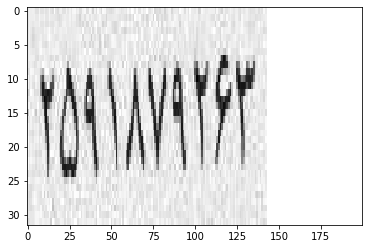

5561832763


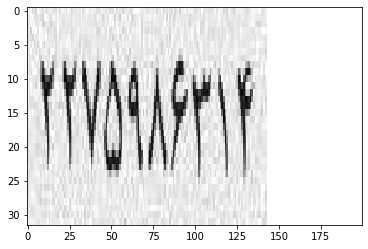

5275986303


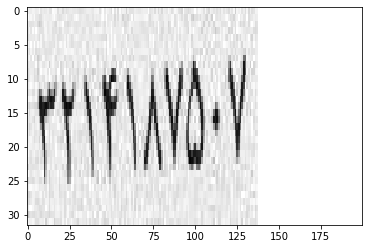

5114187027


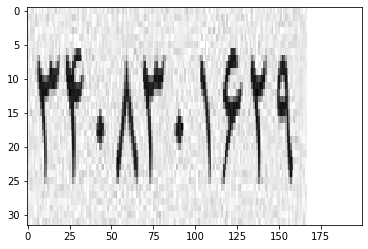

5408301619


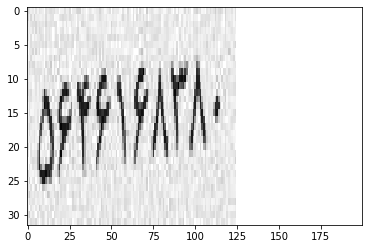

5166168801


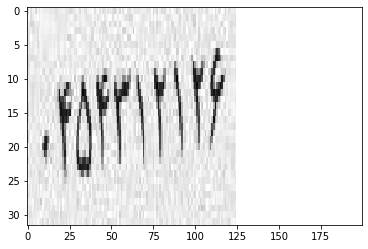

5584312006


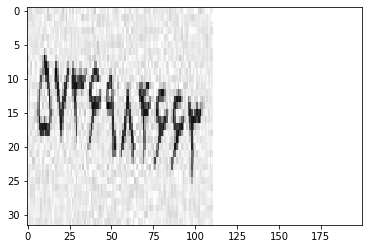

5736984663


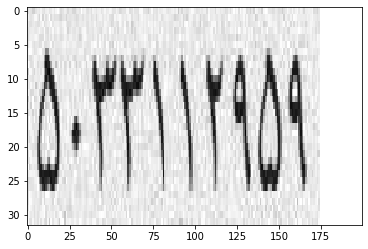

5033112959


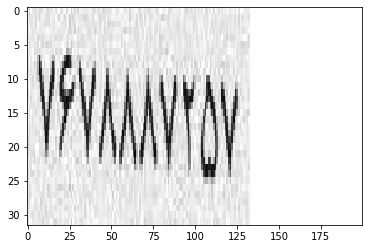

5678887207


In [47]:
from keras.models import load_model


# text = "onmltsrqpoihgrezcba lknrvjihgfueiizltflk"
# text_arr = np.array([text[i:i+word_len] for i in range(0, len(text), word_len)])
# test_x = np.zeros((len(text_arr), word_len, len(alphabet)))

def convert_output_to_text(output):
  output_text = ""
  for i in range(0, output.shape[0]):
    for j in range(0, output.shape[1]):
      index_word = np.argmax(output[i, j] == 1)
      output_text += alphabet[index_word]
  return output_text

model = load_model('model_melli_2.h5')

for i in range(0, 32):
  temp = test_x[i].reshape((test_x[i].shape[0], test_x[i].shape[1]))
  plt.imshow(temp, cmap='gray', aspect="auto", interpolation='nearest')
  plt.show()
  input = test_x[i]
  input = input.reshape((1, input.shape[0], input.shape[1]))
  pred_y = model.predict(input)
  pred_y = tf.one_hot(tf.argmax(pred_y, axis=2), pred_y.shape[2])
  # print(pred_y.shape)
  print(convert_output_to_text(pred_y))

In [7]:
from keras.models import load_model

model = load_model('model_melli_2.h5')

test_loss, test_accuracy = model.evaluate(test_x, test_y)

print("test_accuracy: ", test_accuracy)

59/59 [==============================] - 22s 23ms/step - loss: 0.4973 - accuracy: 0.8103
test_accuracy:  0.8103466629981995
